# **IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# **LOADING DATASET**

In [3]:
df= pd.read_csv('/content/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# **Persiapan Data**

In [5]:
X = df[['Level']]  #features
y = df['Salary']  # Target variable

Ekstraksi Dua Subset Data: Kode ini akan mengekstraksi dua subset data dari Dataset dan menyimpannya dalam variabel terpisah.

Ekstraksi Fitur: Kode ini mengekstraksi fitur dari DataFrame dan menyimpannya dalam variabel bernama X.

Ekstraksi Variabel Target: Kode ini mengekstraksi variabel target dari DataFrame dan menyimpannya dalam variabel bernama y.

memvisualisasikan x dan y hanya untuk melihat hubungan antara x dan y.

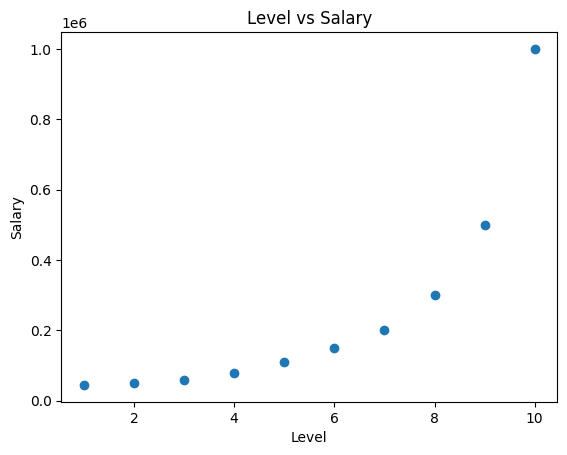

In [6]:
plt.scatter(X,y) # create scatter plot
plt.title("Level vs Salary")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

Dari plot scatter, terlihat jelas bahwa terdapat tren ke atas (peningkatan pada x berhubungan dengan peningkatan pada y).

Selanjutnya melakukan praproses yang akan membantu dalam melakukan scaling pada Y dan X. Setelah itu, data  akan dibagi menjadi data pelatihan dan data pengujian.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

pada pembagian data ini membagi data,70% data training dan 20% data testing.

Jumlah data training: 8
Jumlah data testing: 2
Persentase data training: 80.00%
Persentase data testing: 20.00%


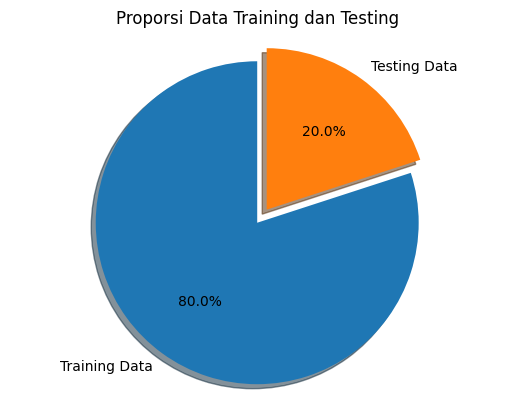

In [8]:

print(f"Jumlah data training: {len(x_train)}")
print(f"Jumlah data testing: {len(x_test)}")

total_data = len(x_train) + len(x_test)
train_percentage = (len(x_train) / total_data) * 100
test_percentage = (len(x_test) / total_data) * 100

print(f"Persentase data training: {train_percentage:.2f}%")
print(f"Persentase data testing: {test_percentage:.2f}%")

# Visualisasi dalam bentuk pie chart
labels = ['Training Data', 'Testing Data']
sizes = [len(x_train), len(x_test)]
explode = (0.1, 0)  # slightly explode the first slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proporsi Data Training dan Testing')
plt.show()

# **Pelatihan**

In [ ]:
Random_forest = RandomForestRegressor(n_estimators=100, max_depth=5)
Random_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

Random forest juga memiliki hyperparameter. Beberapa yang paling penting di antaranya adalah:

1. n_estimators: Jumlah pohon yang disertakan dalam forest (jumlah pohon yang dibangun oleh algoritma sebelum merata-ratakan prediksi).
min_samples_leaf: Jumlah minimum sampel yang dibutuhkan untuk berada pada node daun.
2. max_depth: Kedalaman maksimum setiap pohon dalam forest (yaitu, jumlah node antara node akar dan node daun).
3. random_state: Angka yang digunakan untuk mengatur seed dari random number generator. Ini memastikan bahwa kita mendapatkan pohon yang sama setiap kali kita memanggil model.fit() — hyperparameter ini penting dalam random forest karena prosedur pelatihannya yang secara inheren acak.
4. criterion: Fungsi untuk mengukur kualitas suatu pembagian (split). Secara default, model menggunakan Mean Square Error (mse).

In [ ]:
y_pred = Random_forest.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 189511.0023191266


Nilai RMSE (Root Mean Square Error) sekitar 187,047.07 menunjukkan deviasi rata-rata antara nilai prediksi gaji yang dihasilkan oleh model dan nilai gaji aktual dalam dataset. Secara sederhana, ini memberi tahu kita seberapa besar, rata-rata, perbedaan antara gaji yang diprediksi dan gaji aktual dalam dataset.

Nilai RMSE yang tinggi menunjukkan bahwa prediksi model cukup jauh dari nilai aktual secara rata-rata. Dalam hal ini, RMSE sekitar 187,047.07 mengindikasikan bahwa, rata-rata, prediksi model menyimpang dari gaji aktual sekitar $187,047.07.

RMSE yang tinggi seperti ini mungkin menunjukkan bahwa model tidak berkinerja baik dalam memprediksi gaji secara akurat berdasarkan tingkat posisi.

Jadi mencoba pendekatan lain dengan menulis kode yang memproses data kategori dengan mengonversinya menjadi data numerik, menggabungkan data yang telah diproses dengan data numerik, dan melatih model Random Forest Regression menggunakan data yang telah dipersiapkan.

In [ ]:
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

kita lakukan prediksi dan evaluasi. Kode ini mengevaluasi model Random Forest Regression yang telah dilatih:

*   out-of-bag (OOB) score, yang memperkirakan performa generalisasi model.
* Melakukan prediksi menggunakan model yang telah dilatih dan menyimpannya dalam array 'predictions'.  
* Mengevaluasi performa model menggunakan metrik Mean Squared Error (MSE) dan R-squared (R2).





In [ ]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
predictions = regressor.predict(x)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.644879832593859
Mean Squared Error: 2647325000.0
R-squared: 0.9671801245316117


Output yang disediakan berisi tiga metrik evaluasi untuk model prediktif:
1. Out-of-Bag (OOB) Score:
Skor Out-of-Bag, yang sering dikaitkan dengan metode ensemble seperti Random Forest, menunjukkan kinerja model menggunakan sampel yang tidak termasuk dalam proses bootstrap aggregation (yaitu, sampel Out-of-Bag). Dalam kasus ini, skor OOB adalah sekitar 0,645, yang menunjukkan bahwa model mencapai akurasi sekitar 64,5% pada data yang belum terlihat.

2. Mean Squared Error (MSE):
Mean Squared Error mengukur rata-rata perbedaan kuadrat antara nilai aktual dan nilai prediksi. Di sini, MSE dilaporkan sebesar 2.647.325.000,0, yang menunjukkan bahwa rata-rata perbedaan kuadrat antara nilai prediksi dan aktual adalah sekitar 2,65 miliar. Nilai MSE yang lebih rendah menunjukkan kinerja model yang lebih baik.

3. R-squared (R²):
Nilai R-squared, berkisar dari 0 hingga 1, mewakili proporsi variansi pada variabel dependen (target) yang dapat diprediksi dari variabel independen (fitur) dalam model.
Dalam kasus ini, nilai R-squared adalah sekitar 0,967, yang menunjukkan bahwa model menjelaskan sekitar 96,7% variansi dalam variabel target.
Nilai R-squared yang lebih tinggi menunjukkan bahwa model memiliki kecocokan yang baik terhadap data.

# **Visualisasi**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


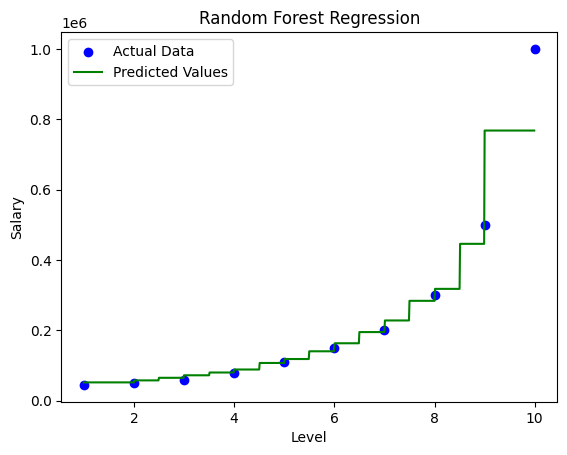

In [ ]:
X_numeric = pd.to_numeric(X['Level'], errors='coerce')
X_grid = np.arange(min(X_numeric), max(X_numeric), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid_scaled = scaler.transform(X_grid)
y_pred_grid = Random_forest.predict(X_grid_scaled)
plt.scatter(X_numeric, y, color='blue', label='Actual Data')
plt.plot(X_grid, y_pred_grid, color='green', label='Predicted Values')

plt.title('Random Forest Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Gambar menunjukkan bahwa model Random Forest Regression telah dibuat untuk memprediksi gaji berdasarkan tingkat posisi. Model ini adalah model regresi non-linier, yang berarti tidak membentuk garis lurus. Sebaliknya, ia membentuk serangkaian langkah, menunjukkan bahwa gaji meningkat secara bertahap dengan meningkatnya tingkat posisi. Model tersebut tampaknya cocok dengan data yang baik, karena garis hijau (prediksi model) sangat dekat dengan titik biru (data sebenarnya).

Berdasarkan hasil ini, kita dapat menyimpulkan bahwa model Random Forest ini merupakan model yang efektif untuk memprediksi gaji berdasarkan tingkat posisi.